# Out-of-sample forecasting experiments

We conduct out-of-sample forecasting experiments to understand what kind of text data (topics, sentiment, or uncertainty) helps improve forecasts of three quarterly variables (GDP, Investment, and Consumption) more.

In this notebook, we evaluate the performance of dynamic factor models (DFM) using hard data and survey information. We forecast Investment growth and establish a benchmark model without the use of text data.

## Experiment Details

- **Data Sources:** Hard data and surveys.
- **Forecast Target:** Investment growth.
- **Model:** Dynamic Factor Models (DFM).
- **Parameters Explored:**
  - **Number of Global Factors:** 1 to 3
  - **Factor Order:** 1 to 3 (for each number of factors)

In [1]:
import os
import time
import datetime
import pandas as pd
import DFM_function

# Define inputs common to all models
q_var = 'Investment'               # quarterly variable being forecasted
additional_factors = None          # or "all" or e.g. ['Labor market']
start = '1991-04'

# Generate list of forecast_month strings for quarters from 2008Q1 to 2018Q4
# forecast_month is set to the month corresponding to quarter-end:
# Q1: 'YYYY-03', Q2: 'YYYY-06', Q3: 'YYYY-09', Q4: 'YYYY-12'
forecast_months = []
for year in range(2008, 2019):
    forecast_months.extend([f"{year}-03", f"{year}-06", f"{year}-09", f"{year}-12"])
    
# Define the vintage column names 
vintage_col_names = ["M1-01", "M1-16", "M2-01", "M2-16", "M3-01", "M3-16", "M4-01"]

# Create directories to save forecasts and MSE results
os.makedirs(f"../forecasts/DFM_hard_surveys_global_factors_{q_var}", exist_ok=True)
os.makedirs(f"../MSE/DFM_hard_surveys_global_factors_{q_var}", exist_ok=True)

# Load the actual growth data
actual_growth_file = f"../{q_var}_growth_actual.csv"
actual_growth = pd.read_csv(actual_growth_file)

# Record overall start time
overall_start = time.time()

# Loop over the number of factors and factor order values from 1 to 3
for num_factors in range(1, 4):  # Varying number of Global factors: 1, 2, 3
    for order in range(1, 4):    # Varying factor order: 1, 2, 3
        
        # Define model-specific parameters
        factor_multiplicities = {'Global': num_factors}
        factor_orders = {'Global': order}

        # Prepare lists to store each quarter's forecasts and row labels
        forecasts_all_quarters = []
        row_labels = []
        
        # Start timing for this model
        start_time = time.time()

        # Loop over each forecast month, get the forecasts, and store the results
        for fm in forecast_months:
            # Use the forecast_month string as the row label
            row_labels.append(fm)

            # Run the forecast function for this quarter
            forecasts_dict = DFM_function.get_forecasts(
                forecast_month = fm,
                q_var = q_var,
                additional_factors = additional_factors,
                factor_multiplicities = factor_multiplicities,
                factor_orders = factor_orders,
                start = start
            )

            # Obtain the correct ordering of vintages
            vintages_order = DFM_function.vintage_dates(fm)
            # Extract the forecast value for each vintage in that order
            quarter_forecasts = [forecasts_dict[vint] for vint in vintages_order]
            forecasts_all_quarters.append(quarter_forecasts)

        # Create a DataFrame with rows labeled by the forecast_month strings and columns as vintage names
        results = pd.DataFrame(forecasts_all_quarters, index=row_labels, columns=vintage_col_names)
        
        # Stop timing for this model and print elapsed time
        elapsed = time.time() - start_time
        elapsed_time = datetime.timedelta(seconds=elapsed)
        print(f"Model with Global factors = {num_factors} and order = {order} estimated in {elapsed_time}.")

        # Construct the output file name
        factors_str = "_".join([
            f"{factor.replace(' ', '_')}_{factor_multiplicities[factor]}_{factor_orders[factor]}"
            for factor in factor_multiplicities])
        file_name = f"forecasts_{q_var}_{factors_str}.csv"

        # Save the CSV file in a subfolder 
        output_path = os.path.join(f"../forecasts/DFM_hard_surveys_global_factors_{q_var}", file_name)
        results.to_csv(output_path, index=True)
        
        # ----- MSE Calculation -----
        # Load forecasts
        forecasts = pd.read_csv(output_path, index_col=0)
        # Make sure the index is a column named "date"
        forecasts.index.name = "date"
        forecasts.reset_index(inplace=True)

        # Merge dfs by date 
        merged = pd.merge(forecasts, actual_growth, on="date", how="inner")

        # Calculate the Mean Squared Error (MSE) for each vintage column
        mse_dict = {}
        for col in vintage_col_names:
            mse = ((merged[col] - merged["growth"]) ** 2).mean()
            mse_dict[col] = mse

        # Create a df with one row (the MSE values for each forecasting horizon)
        mse_df = pd.DataFrame(mse_dict, index=[0])

        # Save MSE results to CSV
        mse_file_name = f"MSE_{q_var}_{factors_str}.csv"
        mse_output_path = os.path.join(f"../MSE/DFM_hard_surveys_global_factors_{q_var}", mse_file_name)
        mse_df.to_csv(mse_output_path, index=False)
        
# Stop overall timing and print overall elapsed time
overall_elapsed = time.time() - overall_start
overall_elapsed_time = datetime.timedelta(seconds=overall_elapsed)
print(f"Overall time taken for running all models: {overall_elapsed_time}.")

EM start iterations, llf=-9184.3
EM converged at iteration 34, llf=-8986, convergence criterion=9.7297e-07 < tolerance=1e-06
EM start iterations, llf=-9197.2
EM converged at iteration 34, llf=-8998.3, convergence criterion=9.7267e-07 < tolerance=1e-06
EM start iterations, llf=-9236.6
EM converged at iteration 34, llf=-9035.2, convergence criterion=9.7812e-07 < tolerance=1e-06
EM start iterations, llf=-9243.5
EM converged at iteration 34, llf=-9042.2, convergence criterion=9.8008e-07 < tolerance=1e-06
EM start iterations, llf=-9292.9
EM converged at iteration 34, llf=-9086.6, convergence criterion=9.447e-07 < tolerance=1e-06
EM start iterations, llf=-9301.3
EM converged at iteration 34, llf=-9093.8, convergence criterion=9.3069e-07 < tolerance=1e-06
EM start iterations, llf=-9342.8
EM converged at iteration 34, llf=-9136.6, convergence criterion=9.7104e-07 < tolerance=1e-06
EM start iterations, llf=-9342.8
EM converged at iteration 34, llf=-9136.6, convergence criterion=9.7104e-07 < tol

EM start iterations, llf=-10551
EM converged at iteration 27, llf=-10394, convergence criterion=8.9302e-07 < tolerance=1e-06
EM start iterations, llf=-10568
EM converged at iteration 27, llf=-10421, convergence criterion=8.9687e-07 < tolerance=1e-06
EM start iterations, llf=-10615
EM converged at iteration 24, llf=-10478, convergence criterion=9.718e-07 < tolerance=1e-06
EM start iterations, llf=-10622
EM converged at iteration 28, llf=-10482, convergence criterion=8.7158e-07 < tolerance=1e-06
EM start iterations, llf=-10661
EM converged at iteration 29, llf=-10516, convergence criterion=9.1365e-07 < tolerance=1e-06
EM start iterations, llf=-10661
EM converged at iteration 29, llf=-10516, convergence criterion=9.1365e-07 < tolerance=1e-06
EM start iterations, llf=-10672
EM converged at iteration 30, llf=-10530, convergence criterion=9.5464e-07 < tolerance=1e-06
EM start iterations, llf=-10710
EM converged at iteration 30, llf=-10569, convergence criterion=8.8855e-07 < tolerance=1e-06
E

EM start iterations, llf=-11897
EM converged at iteration 31, llf=-11745, convergence criterion=9.6521e-07 < tolerance=1e-06
EM start iterations, llf=-11931
EM converged at iteration 32, llf=-11776, convergence criterion=8.8731e-07 < tolerance=1e-06
EM start iterations, llf=-11931
EM converged at iteration 32, llf=-11776, convergence criterion=8.8731e-07 < tolerance=1e-06
EM start iterations, llf=-11940
EM converged at iteration 32, llf=-11786, convergence criterion=8.8719e-07 < tolerance=1e-06
EM start iterations, llf=-11980
EM converged at iteration 31, llf=-11826, convergence criterion=9.9002e-07 < tolerance=1e-06
EM start iterations, llf=-11991
EM converged at iteration 31, llf=-11837, convergence criterion=9.7748e-07 < tolerance=1e-06
EM start iterations, llf=-12028
EM converged at iteration 31, llf=-11873, convergence criterion=9.576e-07 < tolerance=1e-06
EM start iterations, llf=-12035
EM converged at iteration 31, llf=-11880, convergence criterion=9.2801e-07 < tolerance=1e-06
E

EM start iterations, llf=-13230
EM converged at iteration 30, llf=-13051, convergence criterion=8.6619e-07 < tolerance=1e-06
EM start iterations, llf=-13275
EM converged at iteration 29, llf=-13093, convergence criterion=9.9114e-07 < tolerance=1e-06
EM start iterations, llf=-13280
EM converged at iteration 29, llf=-13098, convergence criterion=9.9341e-07 < tolerance=1e-06
EM start iterations, llf=-13320
EM converged at iteration 29, llf=-13138, convergence criterion=9.5966e-07 < tolerance=1e-06
EM start iterations, llf=-13327
EM converged at iteration 29, llf=-13144, convergence criterion=9.7135e-07 < tolerance=1e-06
EM start iterations, llf=-13370
EM converged at iteration 29, llf=-13188, convergence criterion=9.6265e-07 < tolerance=1e-06
EM start iterations, llf=-13370
EM converged at iteration 29, llf=-13188, convergence criterion=9.6265e-07 < tolerance=1e-06
EM start iterations, llf=-13379
EM converged at iteration 29, llf=-13197, convergence criterion=9.408e-07 < tolerance=1e-06
E

EM start iterations, llf=-14422
EM converged at iteration 25, llf=-14231, convergence criterion=9.251e-07 < tolerance=1e-06
EM start iterations, llf=-14428
EM converged at iteration 25, llf=-14237, convergence criterion=9.3106e-07 < tolerance=1e-06
EM start iterations, llf=-14474
EM converged at iteration 25, llf=-14282, convergence criterion=9.3156e-07 < tolerance=1e-06
EM start iterations, llf=-14474
EM converged at iteration 25, llf=-14282, convergence criterion=9.3156e-07 < tolerance=1e-06
EM start iterations, llf=-14479
EM converged at iteration 25, llf=-14287, convergence criterion=9.3224e-07 < tolerance=1e-06
EM start iterations, llf=-14519
EM converged at iteration 25, llf=-14325, convergence criterion=9.8044e-07 < tolerance=1e-06
EM start iterations, llf=-14525
EM converged at iteration 25, llf=-14332, convergence criterion=9.8183e-07 < tolerance=1e-06
EM start iterations, llf=-14568
EM converged at iteration 25, llf=-14373, convergence criterion=9.7105e-07 < tolerance=1e-06
E

EM start iterations, llf=-9465.1
EM converged at iteration 47, llf=-9241.3, convergence criterion=9.7644e-07 < tolerance=1e-06
EM start iterations, llf=-9474.7
EM converged at iteration 48, llf=-9249.2, convergence criterion=9.5718e-07 < tolerance=1e-06
EM start iterations, llf=-9503.9
EM converged at iteration 48, llf=-9280.6, convergence criterion=9.9069e-07 < tolerance=1e-06
EM start iterations, llf=-9515.9
EM converged at iteration 48, llf=-9293.5, convergence criterion=9.772e-07 < tolerance=1e-06
EM start iterations, llf=-9542.4
EM converged at iteration 47, llf=-9316, convergence criterion=9.6859e-07 < tolerance=1e-06
EM start iterations, llf=-9553.6
EM converged at iteration 47, llf=-9328.2, convergence criterion=9.9061e-07 < tolerance=1e-06
EM start iterations, llf=-9620.7
EM converged at iteration 47, llf=-9398.4, convergence criterion=9.6487e-07 < tolerance=1e-06
EM start iterations, llf=-9620.7
EM converged at iteration 47, llf=-9398.4, convergence criterion=9.6487e-07 < tol

EM iteration 50, llf=-10627, convergence criterion=1.0469e-06
EM converged at iteration 52, llf=-10627, convergence criterion=9.7292e-07 < tolerance=1e-06
EM start iterations, llf=-10816
EM iteration 50, llf=-10670, convergence criterion=1.0654e-06
EM converged at iteration 52, llf=-10670, convergence criterion=9.9175e-07 < tolerance=1e-06
EM start iterations, llf=-10816
EM iteration 50, llf=-10670, convergence criterion=1.0654e-06
EM converged at iteration 52, llf=-10670, convergence criterion=9.9175e-07 < tolerance=1e-06
EM start iterations, llf=-10826
EM iteration 50, llf=-10685, convergence criterion=1.1818e-06
EM converged at iteration 56, llf=-10685, convergence criterion=9.7964e-07 < tolerance=1e-06
EM start iterations, llf=-10861
EM iteration 50, llf=-10721, convergence criterion=1.2248e-06
EM converged at iteration 58, llf=-10721, convergence criterion=9.9126e-07 < tolerance=1e-06
EM start iterations, llf=-10868
EM iteration 50, llf=-10727, convergence criterion=1.1622e-06
EM 

EM start iterations, llf=-11796
EM iteration 50, llf=-11647, convergence criterion=9.8068e-07
EM converged at iteration 50, llf=-11647, convergence criterion=9.8068e-07 < tolerance=1e-06
EM start iterations, llf=-11800
EM iteration 50, llf=-11648, convergence criterion=9.6541e-07
EM converged at iteration 50, llf=-11648, convergence criterion=9.6541e-07 < tolerance=1e-06
EM start iterations, llf=-11838
EM converged at iteration 48, llf=-11684, convergence criterion=9.8299e-07 < tolerance=1e-06
EM start iterations, llf=-11848
EM converged at iteration 49, llf=-11697, convergence criterion=9.9116e-07 < tolerance=1e-06
EM start iterations, llf=-11889
EM converged at iteration 48, llf=-11738, convergence criterion=9.8678e-07 < tolerance=1e-06
EM start iterations, llf=-11896
EM converged at iteration 48, llf=-11744, convergence criterion=9.789e-07 < tolerance=1e-06
EM start iterations, llf=-11930
EM converged at iteration 48, llf=-11775, convergence criterion=9.6306e-07 < tolerance=1e-06
EM

EM start iterations, llf=-13128
EM converged at iteration 41, llf=-12954, convergence criterion=9.8094e-07 < tolerance=1e-06
EM start iterations, llf=-13133
EM converged at iteration 41, llf=-12956, convergence criterion=9.6644e-07 < tolerance=1e-06
EM start iterations, llf=-13176
EM converged at iteration 41, llf=-12998, convergence criterion=9.8008e-07 < tolerance=1e-06
EM start iterations, llf=-13183
EM converged at iteration 41, llf=-13004, convergence criterion=9.692e-07 < tolerance=1e-06
EM start iterations, llf=-13217
EM converged at iteration 41, llf=-13036, convergence criterion=9.7353e-07 < tolerance=1e-06
EM start iterations, llf=-13217
EM converged at iteration 41, llf=-13036, convergence criterion=9.7353e-07 < tolerance=1e-06
EM start iterations, llf=-13230
EM converged at iteration 41, llf=-13049, convergence criterion=9.7424e-07 < tolerance=1e-06
EM start iterations, llf=-13275
EM converged at iteration 41, llf=-13090, convergence criterion=9.7848e-07 < tolerance=1e-06
E

EM start iterations, llf=-14477
EM converged at iteration 35, llf=-14285, convergence criterion=9.8912e-07 < tolerance=1e-06
EM start iterations, llf=-14314
EM converged at iteration 36, llf=-14117, convergence criterion=9.8911e-07 < tolerance=1e-06
EM start iterations, llf=-14314
EM converged at iteration 36, llf=-14117, convergence criterion=9.8911e-07 < tolerance=1e-06
EM start iterations, llf=-14322
EM converged at iteration 36, llf=-14128, convergence criterion=9.8664e-07 < tolerance=1e-06
EM start iterations, llf=-14364
EM converged at iteration 36, llf=-14172, convergence criterion=9.6143e-07 < tolerance=1e-06
EM start iterations, llf=-14375
EM converged at iteration 36, llf=-14181, convergence criterion=9.6395e-07 < tolerance=1e-06
EM start iterations, llf=-14422
EM converged at iteration 36, llf=-14228, convergence criterion=9.6992e-07 < tolerance=1e-06
EM start iterations, llf=-14428
EM converged at iteration 36, llf=-14235, convergence criterion=9.7176e-07 < tolerance=1e-06


EM start iterations, llf=-9458.4
EM converged at iteration 44, llf=-9233.6, convergence criterion=9.5568e-07 < tolerance=1e-06
EM start iterations, llf=-9468.4
EM converged at iteration 44, llf=-9241.7, convergence criterion=9.8124e-07 < tolerance=1e-06
EM start iterations, llf=-9497.9
EM converged at iteration 46, llf=-9273.7, convergence criterion=9.5078e-07 < tolerance=1e-06
EM start iterations, llf=-9509.6
EM converged at iteration 45, llf=-9286.5, convergence criterion=9.8671e-07 < tolerance=1e-06
EM start iterations, llf=-9536.7
EM converged at iteration 47, llf=-9309.2, convergence criterion=9.7487e-07 < tolerance=1e-06
EM start iterations, llf=-9547.9
EM converged at iteration 47, llf=-9321.4, convergence criterion=9.9403e-07 < tolerance=1e-06
EM start iterations, llf=-9615.1
EM converged at iteration 46, llf=-9391.1, convergence criterion=9.7801e-07 < tolerance=1e-06
EM start iterations, llf=-9615.1
EM converged at iteration 46, llf=-9391.1, convergence criterion=9.7801e-07 < 

EM start iterations, llf=-10765
EM converged at iteration 49, llf=-10622, convergence criterion=9.7092e-07 < tolerance=1e-06
EM start iterations, llf=-10807
EM iteration 50, llf=-10665, convergence criterion=9.7618e-07
EM converged at iteration 50, llf=-10665, convergence criterion=9.7618e-07 < tolerance=1e-06
EM start iterations, llf=-10807
EM iteration 50, llf=-10665, convergence criterion=9.7618e-07
EM converged at iteration 50, llf=-10665, convergence criterion=9.7618e-07 < tolerance=1e-06
EM start iterations, llf=-10818
EM iteration 50, llf=-10680, convergence criterion=1.0555e-06
EM converged at iteration 52, llf=-10680, convergence criterion=9.567e-07 < tolerance=1e-06
EM start iterations, llf=-10851
EM iteration 50, llf=-10716, convergence criterion=1.0375e-06
EM converged at iteration 51, llf=-10716, convergence criterion=9.9037e-07 < tolerance=1e-06
EM start iterations, llf=-10859
EM iteration 50, llf=-10721, convergence criterion=1.03e-06
EM converged at iteration 51, llf=-1

EM start iterations, llf=-11787
EM iteration 50, llf=-11642, convergence criterion=9.8504e-07
EM converged at iteration 50, llf=-11642, convergence criterion=9.8504e-07 < tolerance=1e-06
EM start iterations, llf=-11787
EM iteration 50, llf=-11642, convergence criterion=9.8504e-07
EM converged at iteration 50, llf=-11642, convergence criterion=9.8504e-07 < tolerance=1e-06
EM start iterations, llf=-11792
EM iteration 50, llf=-11643, convergence criterion=9.6257e-07
EM converged at iteration 50, llf=-11643, convergence criterion=9.6257e-07 < tolerance=1e-06
EM start iterations, llf=-11830
EM converged at iteration 49, llf=-11679, convergence criterion=9.7119e-07 < tolerance=1e-06
EM start iterations, llf=-11840
EM iteration 50, llf=-11693, convergence criterion=9.5878e-07
EM converged at iteration 50, llf=-11693, convergence criterion=9.5878e-07 < tolerance=1e-06
EM start iterations, llf=-11881
EM iteration 50, llf=-11733, convergence criterion=9.5523e-07
EM converged at iteration 50, llf

EM start iterations, llf=-13038
EM converged at iteration 45, llf=-12862, convergence criterion=9.6625e-07 < tolerance=1e-06
EM start iterations, llf=-13075
EM converged at iteration 45, llf=-12897, convergence criterion=9.5812e-07 < tolerance=1e-06
EM start iterations, llf=-13075
EM converged at iteration 45, llf=-12897, convergence criterion=9.5812e-07 < tolerance=1e-06
EM start iterations, llf=-13081
EM converged at iteration 45, llf=-12910, convergence criterion=9.9489e-07 < tolerance=1e-06
EM start iterations, llf=-13119
EM converged at iteration 45, llf=-12948, convergence criterion=9.9823e-07 < tolerance=1e-06
EM start iterations, llf=-13124
EM converged at iteration 45, llf=-12950, convergence criterion=9.7507e-07 < tolerance=1e-06
EM start iterations, llf=-13167
EM converged at iteration 45, llf=-12992, convergence criterion=9.9181e-07 < tolerance=1e-06
EM start iterations, llf=-13174
EM converged at iteration 45, llf=-12998, convergence criterion=9.8044e-07 < tolerance=1e-06


EM start iterations, llf=-14373
EM converged at iteration 41, llf=-14187, convergence criterion=9.8897e-07 < tolerance=1e-06
EM start iterations, llf=-14416
EM converged at iteration 41, llf=-14229, convergence criterion=9.6963e-07 < tolerance=1e-06
EM start iterations, llf=-14422
EM converged at iteration 41, llf=-14231, convergence criterion=9.6288e-07 < tolerance=1e-06
EM start iterations, llf=-14454
EM converged at iteration 41, llf=-14261, convergence criterion=9.5971e-07 < tolerance=1e-06
EM start iterations, llf=-14468
EM converged at iteration 41, llf=-14279, convergence criterion=9.5389e-07 < tolerance=1e-06
EM start iterations, llf=-14306
EM converged at iteration 41, llf=-14110, convergence criterion=9.617e-07 < tolerance=1e-06
EM start iterations, llf=-14306
EM converged at iteration 41, llf=-14110, convergence criterion=9.617e-07 < tolerance=1e-06
EM start iterations, llf=-14313
EM converged at iteration 41, llf=-14121, convergence criterion=9.7103e-07 < tolerance=1e-06
EM

EM start iterations, llf=-8903.7
EM converged at iteration 23, llf=-8797.4, convergence criterion=9.5503e-07 < tolerance=1e-06
EM start iterations, llf=-8946.7
EM converged at iteration 24, llf=-8836.2, convergence criterion=9.887e-07 < tolerance=1e-06
EM start iterations, llf=-8950.7
EM converged at iteration 24, llf=-8841.4, convergence criterion=9.6054e-07 < tolerance=1e-06
EM start iterations, llf=-8977.7
EM converged at iteration 23, llf=-8869.6, convergence criterion=9.6624e-07 < tolerance=1e-06
EM start iterations, llf=-8977.7
EM converged at iteration 23, llf=-8869.6, convergence criterion=9.6624e-07 < tolerance=1e-06
EM start iterations, llf=-8987.1
EM converged at iteration 26, llf=-8880, convergence criterion=9.7926e-07 < tolerance=1e-06
EM start iterations, llf=-9017.4
EM converged at iteration 32, llf=-8912.1, convergence criterion=9.7248e-07 < tolerance=1e-06
EM start iterations, llf=-9027.6
EM converged at iteration 29, llf=-8922.1, convergence criterion=9.579e-07 < tole

EM start iterations, llf=-10082
EM converged at iteration 22, llf=-9969.3, convergence criterion=9.9965e-07 < tolerance=1e-06
EM start iterations, llf=-10119
EM converged at iteration 22, llf=-10006, convergence criterion=9.7384e-07 < tolerance=1e-06
EM start iterations, llf=-10119
EM converged at iteration 22, llf=-10006, convergence criterion=9.7384e-07 < tolerance=1e-06
EM start iterations, llf=-10128
EM converged at iteration 22, llf=-10014, convergence criterion=9.7072e-07 < tolerance=1e-06
EM start iterations, llf=-10165
EM converged at iteration 23, llf=-10050, convergence criterion=9.3369e-07 < tolerance=1e-06
EM start iterations, llf=-10177
EM converged at iteration 22, llf=-10062, convergence criterion=9.9552e-07 < tolerance=1e-06
EM start iterations, llf=-10212
EM converged at iteration 22, llf=-10097, convergence criterion=9.5888e-07 < tolerance=1e-06
EM start iterations, llf=-10220
EM converged at iteration 23, llf=-10105, convergence criterion=9.3053e-07 < tolerance=1e-06

EM start iterations, llf=-11335
EM converged at iteration 18, llf=-11219, convergence criterion=9.5826e-07 < tolerance=1e-06
EM start iterations, llf=-11366
EM converged at iteration 18, llf=-11249, convergence criterion=9.2899e-07 < tolerance=1e-06
EM start iterations, llf=-11375
EM converged at iteration 18, llf=-11259, convergence criterion=9.3111e-07 < tolerance=1e-06
EM start iterations, llf=-11420
EM converged at iteration 18, llf=-11303, convergence criterion=9.1987e-07 < tolerance=1e-06
EM start iterations, llf=-11430
EM converged at iteration 18, llf=-11313, convergence criterion=9.3192e-07 < tolerance=1e-06
EM start iterations, llf=-11470
EM converged at iteration 18, llf=-11354, convergence criterion=9.5811e-07 < tolerance=1e-06
EM start iterations, llf=-11470
EM converged at iteration 18, llf=-11354, convergence criterion=9.5811e-07 < tolerance=1e-06
EM start iterations, llf=-11482
EM converged at iteration 18, llf=-11366, convergence criterion=9.6752e-07 < tolerance=1e-06


EM start iterations, llf=-12664
EM converged at iteration 19, llf=-12544, convergence criterion=9.6194e-07 < tolerance=1e-06
EM start iterations, llf=-12675
EM converged at iteration 19, llf=-12554, convergence criterion=9.5842e-07 < tolerance=1e-06
EM start iterations, llf=-12711
EM converged at iteration 19, llf=-12589, convergence criterion=9.7822e-07 < tolerance=1e-06
EM start iterations, llf=-12711
EM converged at iteration 19, llf=-12589, convergence criterion=9.7822e-07 < tolerance=1e-06
EM start iterations, llf=-12720
EM converged at iteration 19, llf=-12599, convergence criterion=9.8963e-07 < tolerance=1e-06
EM start iterations, llf=-12755
EM converged at iteration 19, llf=-12633, convergence criterion=9.827e-07 < tolerance=1e-06
EM start iterations, llf=-12759
EM converged at iteration 19, llf=-12638, convergence criterion=9.8309e-07 < tolerance=1e-06
EM start iterations, llf=-12800
EM converged at iteration 20, llf=-12678, convergence criterion=9.3537e-07 < tolerance=1e-06
E

EM start iterations, llf=-13749
EM converged at iteration 19, llf=-13626, convergence criterion=9.5293e-07 < tolerance=1e-06
EM start iterations, llf=-13756
EM converged at iteration 19, llf=-13633, convergence criterion=9.5739e-07 < tolerance=1e-06
EM start iterations, llf=-13799
EM converged at iteration 19, llf=-13676, convergence criterion=9.3415e-07 < tolerance=1e-06
EM start iterations, llf=-13803
EM converged at iteration 19, llf=-13682, convergence criterion=9.5145e-07 < tolerance=1e-06
EM start iterations, llf=-13839
EM converged at iteration 19, llf=-13718, convergence criterion=9.6129e-07 < tolerance=1e-06
EM start iterations, llf=-13852
EM converged at iteration 19, llf=-13731, convergence criterion=9.656e-07 < tolerance=1e-06
EM start iterations, llf=-13886
EM converged at iteration 19, llf=-13763, convergence criterion=9.5147e-07 < tolerance=1e-06
EM start iterations, llf=-13886
EM converged at iteration 19, llf=-13763, convergence criterion=9.5147e-07 < tolerance=1e-06
E

EM start iterations, llf=-9104.4
EM iteration 50, llf=-8998.5, convergence criterion=9.9862e-07
EM converged at iteration 50, llf=-8998.5, convergence criterion=9.9862e-07 < tolerance=1e-06
EM start iterations, llf=-9104.4
EM iteration 50, llf=-8998.5, convergence criterion=9.9862e-07
EM converged at iteration 50, llf=-8998.5, convergence criterion=9.9862e-07 < tolerance=1e-06
EM start iterations, llf=-9116.5
EM iteration 50, llf=-9012.1, convergence criterion=9.9806e-07
EM converged at iteration 50, llf=-9012.1, convergence criterion=9.9806e-07 < tolerance=1e-06
EM start iterations, llf=-9169
EM converged at iteration 46, llf=-9070.7, convergence criterion=9.9081e-07 < tolerance=1e-06
EM start iterations, llf=-9155.8
EM converged at iteration 49, llf=-9056.5, convergence criterion=9.8583e-07 < tolerance=1e-06
EM start iterations, llf=-9163.8
EM converged at iteration 44, llf=-9056.9, convergence criterion=9.7679e-07 < tolerance=1e-06
EM start iterations, llf=-9162.5
EM converged at it

EM start iterations, llf=-10249
EM converged at iteration 39, llf=-10132, convergence criterion=9.9362e-07 < tolerance=1e-06
EM start iterations, llf=-10258
EM converged at iteration 39, llf=-10143, convergence criterion=9.814e-07 < tolerance=1e-06
EM start iterations, llf=-10292
EM converged at iteration 40, llf=-10177, convergence criterion=9.768e-07 < tolerance=1e-06
EM start iterations, llf=-10301
EM converged at iteration 41, llf=-10186, convergence criterion=9.7564e-07 < tolerance=1e-06
EM start iterations, llf=-10334
EM converged at iteration 40, llf=-10219, convergence criterion=9.9819e-07 < tolerance=1e-06
EM start iterations, llf=-10327
EM converged at iteration 39, llf=-10215, convergence criterion=9.8467e-07 < tolerance=1e-06
EM start iterations, llf=-10358
EM converged at iteration 39, llf=-10245, convergence criterion=9.7474e-07 < tolerance=1e-06
EM start iterations, llf=-10358
EM converged at iteration 39, llf=-10245, convergence criterion=9.7474e-07 < tolerance=1e-06
EM

EM start iterations, llf=-11523
EM converged at iteration 28, llf=-11407, convergence criterion=9.6648e-07 < tolerance=1e-06
EM start iterations, llf=-11562
EM converged at iteration 28, llf=-11446, convergence criterion=9.7286e-07 < tolerance=1e-06
EM start iterations, llf=-11568
EM converged at iteration 28, llf=-11452, convergence criterion=9.7695e-07 < tolerance=1e-06
EM start iterations, llf=-11601
EM converged at iteration 27, llf=-11487, convergence criterion=9.7612e-07 < tolerance=1e-06
EM start iterations, llf=-11601
EM converged at iteration 27, llf=-11487, convergence criterion=9.7612e-07 < tolerance=1e-06
EM start iterations, llf=-11613
EM converged at iteration 27, llf=-11498, convergence criterion=9.5969e-07 < tolerance=1e-06
EM start iterations, llf=-11655
EM converged at iteration 27, llf=-11538, convergence criterion=9.7439e-07 < tolerance=1e-06
EM start iterations, llf=-11654
EM converged at iteration 27, llf=-11539, convergence criterion=9.9139e-07 < tolerance=1e-06


EM start iterations, llf=-12838
EM converged at iteration 25, llf=-12717, convergence criterion=9.8364e-07 < tolerance=1e-06
EM start iterations, llf=-12838
EM converged at iteration 25, llf=-12717, convergence criterion=9.8364e-07 < tolerance=1e-06
EM start iterations, llf=-12847
EM converged at iteration 25, llf=-12724, convergence criterion=9.8058e-07 < tolerance=1e-06
EM start iterations, llf=-12882
EM converged at iteration 25, llf=-12759, convergence criterion=9.6988e-07 < tolerance=1e-06
EM start iterations, llf=-12886
EM converged at iteration 25, llf=-12764, convergence criterion=9.6608e-07 < tolerance=1e-06
EM start iterations, llf=-12927
EM converged at iteration 25, llf=-12805, convergence criterion=9.5614e-07 < tolerance=1e-06
EM start iterations, llf=-12936
EM converged at iteration 25, llf=-12814, convergence criterion=9.7066e-07 < tolerance=1e-06
EM start iterations, llf=-12968
EM converged at iteration 25, llf=-12846, convergence criterion=9.8344e-07 < tolerance=1e-06


EM start iterations, llf=-13924
EM converged at iteration 26, llf=-13801, convergence criterion=9.9133e-07 < tolerance=1e-06
EM start iterations, llf=-13932
EM converged at iteration 26, llf=-13808, convergence criterion=9.8525e-07 < tolerance=1e-06
EM start iterations, llf=-13967
EM converged at iteration 26, llf=-13845, convergence criterion=9.6454e-07 < tolerance=1e-06
EM start iterations, llf=-13974
EM converged at iteration 26, llf=-13851, convergence criterion=9.5949e-07 < tolerance=1e-06
EM start iterations, llf=-14007
EM converged at iteration 26, llf=-13884, convergence criterion=9.5413e-07 < tolerance=1e-06
EM start iterations, llf=-14007
EM converged at iteration 26, llf=-13884, convergence criterion=9.5413e-07 < tolerance=1e-06
EM start iterations, llf=-14012
EM converged at iteration 26, llf=-13888, convergence criterion=9.5699e-07 < tolerance=1e-06
EM start iterations, llf=-14054
EM converged at iteration 26, llf=-13930, convergence criterion=9.5803e-07 < tolerance=1e-06


EM start iterations, llf=-9255.1
EM iteration 50, llf=-9132.4, convergence criterion=1.0128e-06
EM converged at iteration 51, llf=-9132.4, convergence criterion=9.8824e-07 < tolerance=1e-06
EM start iterations, llf=-9278.4
EM iteration 50, llf=-9156.8, convergence criterion=1.4478e-06
EM converged at iteration 67, llf=-9156.6, convergence criterion=9.9866e-07 < tolerance=1e-06
EM start iterations, llf=-9278.4
EM iteration 50, llf=-9156.8, convergence criterion=1.4478e-06
EM converged at iteration 67, llf=-9156.6, convergence criterion=9.9866e-07 < tolerance=1e-06
EM start iterations, llf=-9282.8
EM iteration 50, llf=-9164.8, convergence criterion=1.4058e-06
EM converged at iteration 66, llf=-9164.7, convergence criterion=9.9761e-07 < tolerance=1e-06
EM start iterations, llf=-9321.3
EM iteration 50, llf=-9207, convergence criterion=1.1846e-06
EM converged at iteration 57, llf=-9206.9, convergence criterion=9.9519e-07 < tolerance=1e-06
EM start iterations, llf=-9332.5
EM iteration 50, ll

EM converged at iteration 55, llf=-9993, convergence criterion=9.9586e-07 < tolerance=1e-06
EM start iterations, llf=-10106
EM iteration 50, llf=-9993.1, convergence criterion=1.1473e-06
EM converged at iteration 55, llf=-9993, convergence criterion=9.9586e-07 < tolerance=1e-06
EM start iterations, llf=-10115
EM iteration 50, llf=-10001, convergence criterion=1.154e-06
EM converged at iteration 56, llf=-10001, convergence criterion=9.7504e-07 < tolerance=1e-06
EM start iterations, llf=-10153
EM iteration 50, llf=-10037, convergence criterion=1.1919e-06
EM converged at iteration 57, llf=-10037, convergence criterion=9.8107e-07 < tolerance=1e-06
EM start iterations, llf=-10164
EM iteration 50, llf=-10049, convergence criterion=1.1773e-06
EM converged at iteration 56, llf=-10049, convergence criterion=9.933e-07 < tolerance=1e-06
EM start iterations, llf=-10200
EM iteration 50, llf=-10084, convergence criterion=1.1501e-06
EM converged at iteration 55, llf=-10084, convergence criterion=9.97

EM start iterations, llf=-11002
EM converged at iteration 49, llf=-10887, convergence criterion=9.92e-07 < tolerance=1e-06
EM start iterations, llf=-11012
EM converged at iteration 49, llf=-10897, convergence criterion=9.9608e-07 < tolerance=1e-06
EM start iterations, llf=-11051
EM converged at iteration 48, llf=-10933, convergence criterion=9.8819e-07 < tolerance=1e-06
EM start iterations, llf=-11051
EM converged at iteration 48, llf=-10933, convergence criterion=9.8819e-07 < tolerance=1e-06
EM start iterations, llf=-11056
EM converged at iteration 48, llf=-10939, convergence criterion=9.9896e-07 < tolerance=1e-06
EM start iterations, llf=-11090
EM converged at iteration 49, llf=-10975, convergence criterion=9.8052e-07 < tolerance=1e-06
EM start iterations, llf=-11101
EM converged at iteration 48, llf=-10984, convergence criterion=9.9874e-07 < tolerance=1e-06
EM start iterations, llf=-11141
EM converged at iteration 47, llf=-11025, convergence criterion=9.8106e-07 < tolerance=1e-06
EM

EM converged at iteration 46, llf=-12134, convergence criterion=9.8331e-07 < tolerance=1e-06
EM start iterations, llf=-12290
EM converged at iteration 46, llf=-12171, convergence criterion=9.8487e-07 < tolerance=1e-06
EM start iterations, llf=-12290
EM converged at iteration 46, llf=-12171, convergence criterion=9.8487e-07 < tolerance=1e-06
EM start iterations, llf=-12291
EM converged at iteration 47, llf=-12171, convergence criterion=9.6986e-07 < tolerance=1e-06
EM start iterations, llf=-12326
EM converged at iteration 48, llf=-12206, convergence criterion=9.7322e-07 < tolerance=1e-06
EM start iterations, llf=-12332
EM converged at iteration 47, llf=-12212, convergence criterion=9.8081e-07 < tolerance=1e-06
EM start iterations, llf=-12374
EM converged at iteration 47, llf=-12253, convergence criterion=9.95e-07 < tolerance=1e-06
EM start iterations, llf=-12382
EM converged at iteration 47, llf=-12262, convergence criterion=9.8061e-07 < tolerance=1e-06
EM start iterations, llf=-12413
EM

EM start iterations, llf=-13297
EM iteration 50, llf=-13173, convergence criterion=9.9869e-07
EM converged at iteration 50, llf=-13173, convergence criterion=9.9869e-07 < tolerance=1e-06
EM start iterations, llf=-13335
EM iteration 50, llf=-13211, convergence criterion=1.016e-06
EM converged at iteration 51, llf=-13211, convergence criterion=9.872e-07 < tolerance=1e-06
EM start iterations, llf=-13343
EM iteration 50, llf=-13218, convergence criterion=1.0237e-06
EM converged at iteration 51, llf=-13218, convergence criterion=9.9467e-07 < tolerance=1e-06
EM start iterations, llf=-13382
EM iteration 50, llf=-13257, convergence criterion=1.0091e-06
EM converged at iteration 51, llf=-13257, convergence criterion=9.8072e-07 < tolerance=1e-06
EM start iterations, llf=-13382
EM iteration 50, llf=-13257, convergence criterion=1.0091e-06
EM converged at iteration 51, llf=-13257, convergence criterion=9.8072e-07 < tolerance=1e-06
EM start iterations, llf=-13388
EM iteration 50, llf=-13264, conver

EM start iterations, llf=-14245
EM converged at iteration 45, llf=-14117, convergence criterion=9.9372e-07 < tolerance=1e-06
EM start iterations, llf=-14275
EM converged at iteration 45, llf=-14147, convergence criterion=9.9391e-07 < tolerance=1e-06
EM start iterations, llf=-14275
EM converged at iteration 45, llf=-14147, convergence criterion=9.9391e-07 < tolerance=1e-06
EM start iterations, llf=-13997
EM converged at iteration 48, llf=-13876, convergence criterion=9.7448e-07 < tolerance=1e-06
EM start iterations, llf=-14037
EM converged at iteration 46, llf=-13917, convergence criterion=9.7819e-07 < tolerance=1e-06
EM start iterations, llf=-14048
EM converged at iteration 46, llf=-13928, convergence criterion=9.7347e-07 < tolerance=1e-06
EM start iterations, llf=-14089
EM converged at iteration 46, llf=-13969, convergence criterion=9.9923e-07 < tolerance=1e-06
EM start iterations, llf=-14093
EM converged at iteration 46, llf=-13973, convergence criterion=9.9936e-07 < tolerance=1e-06


EM start iterations, llf=-9484.3
EM converged at iteration 40, llf=-9338.4, convergence criterion=9.6782e-07 < tolerance=1e-06
EM start iterations, llf=-9523.8
EM converged at iteration 37, llf=-9376.6, convergence criterion=9.9194e-07 < tolerance=1e-06
EM start iterations, llf=-9523.8
EM converged at iteration 37, llf=-9376.6, convergence criterion=9.9194e-07 < tolerance=1e-06
EM start iterations, llf=-9536.9
EM converged at iteration 38, llf=-9388.3, convergence criterion=9.6001e-07 < tolerance=1e-06
EM start iterations, llf=-9566.1
EM converged at iteration 36, llf=-9419.5, convergence criterion=9.9707e-07 < tolerance=1e-06
EM start iterations, llf=-9568.3
EM converged at iteration 36, llf=-9426.3, convergence criterion=9.7293e-07 < tolerance=1e-06
EM start iterations, llf=-9599.1
EM converged at iteration 37, llf=-9457.6, convergence criterion=9.7356e-07 < tolerance=1e-06
EM start iterations, llf=-9646.4
EM converged at iteration 38, llf=-9504.1, convergence criterion=9.8642e-07 < 

EM converged at iteration 48, llf=-10490, convergence criterion=9.6962e-07 < tolerance=1e-06
EM start iterations, llf=-10661
EM converged at iteration 47, llf=-10498, convergence criterion=9.6724e-07 < tolerance=1e-06
EM start iterations, llf=-10697
EM converged at iteration 47, llf=-10534, convergence criterion=9.6263e-07 < tolerance=1e-06
EM start iterations, llf=-10697
EM converged at iteration 47, llf=-10534, convergence criterion=9.6263e-07 < tolerance=1e-06
EM start iterations, llf=-10702
EM converged at iteration 46, llf=-10539, convergence criterion=9.8091e-07 < tolerance=1e-06
EM start iterations, llf=-10733
EM converged at iteration 45, llf=-10570, convergence criterion=9.9623e-07 < tolerance=1e-06
EM start iterations, llf=-10739
EM converged at iteration 45, llf=-10576, convergence criterion=9.8988e-07 < tolerance=1e-06
EM start iterations, llf=-10778
EM converged at iteration 47, llf=-10616, convergence criterion=9.7039e-07 < tolerance=1e-06
EM start iterations, llf=-10787


EM start iterations, llf=-11923
EM converged at iteration 44, llf=-11753, convergence criterion=9.6376e-07 < tolerance=1e-06
EM start iterations, llf=-11933
EM converged at iteration 43, llf=-11763, convergence criterion=9.9411e-07 < tolerance=1e-06
EM start iterations, llf=-11967
EM converged at iteration 44, llf=-11796, convergence criterion=9.6367e-07 < tolerance=1e-06
EM start iterations, llf=-11973
EM converged at iteration 43, llf=-11802, convergence criterion=9.9372e-07 < tolerance=1e-06
EM start iterations, llf=-12004
EM converged at iteration 43, llf=-11835, convergence criterion=9.6619e-07 < tolerance=1e-06
EM start iterations, llf=-12015
EM converged at iteration 43, llf=-11845, convergence criterion=9.6958e-07 < tolerance=1e-06
EM start iterations, llf=-12048
EM converged at iteration 43, llf=-11879, convergence criterion=9.8514e-07 < tolerance=1e-06
EM start iterations, llf=-12048
EM converged at iteration 43, llf=-11879, convergence criterion=9.8514e-07 < tolerance=1e-06


EM start iterations, llf=-13187
EM converged at iteration 41, llf=-13004, convergence criterion=9.9928e-07 < tolerance=1e-06
EM start iterations, llf=-13220
EM converged at iteration 42, llf=-13039, convergence criterion=9.6232e-07 < tolerance=1e-06
EM start iterations, llf=-13230
EM converged at iteration 41, llf=-13047, convergence criterion=9.8588e-07 < tolerance=1e-06
EM start iterations, llf=-13259
EM converged at iteration 41, llf=-13077, convergence criterion=9.8671e-07 < tolerance=1e-06
EM start iterations, llf=-13259
EM converged at iteration 41, llf=-13077, convergence criterion=9.8671e-07 < tolerance=1e-06
EM start iterations, llf=-13272
EM converged at iteration 41, llf=-13089, convergence criterion=9.8211e-07 < tolerance=1e-06
EM start iterations, llf=-13309
EM converged at iteration 41, llf=-13128, convergence criterion=9.9596e-07 < tolerance=1e-06
EM start iterations, llf=-13315
EM converged at iteration 41, llf=-13138, convergence criterion=9.8497e-07 < tolerance=1e-06


EM start iterations, llf=-8572.1
EM iteration 50, llf=-8494.1, convergence criterion=1.4741e-06
EM converged at iteration 65, llf=-8493.9, convergence criterion=9.7701e-07 < tolerance=1e-06
EM start iterations, llf=-8606.7
EM iteration 50, llf=-8525.4, convergence criterion=1.6205e-06
EM converged at iteration 69, llf=-8525.2, convergence criterion=9.8364e-07 < tolerance=1e-06
EM start iterations, llf=-8606.7
EM iteration 50, llf=-8525.4, convergence criterion=1.6205e-06
EM converged at iteration 69, llf=-8525.2, convergence criterion=9.8364e-07 < tolerance=1e-06
EM start iterations, llf=-8612.2
EM iteration 50, llf=-8532.3, convergence criterion=1.5928e-06
EM converged at iteration 68, llf=-8532.1, convergence criterion=9.8126e-07 < tolerance=1e-06
EM start iterations, llf=-8644.2
EM iteration 50, llf=-8563.7, convergence criterion=1.4617e-06
EM converged at iteration 64, llf=-8563.6, convergence criterion=9.7955e-07 < tolerance=1e-06
EM start iterations, llf=-8649.6
EM iteration 50, 

EM start iterations, llf=-9510.6
EM iteration 50, llf=-9366.9, convergence criterion=1.0016e-06
EM converged at iteration 51, llf=-9366.9, convergence criterion=9.759e-07 < tolerance=1e-06
EM start iterations, llf=-9510.6
EM iteration 50, llf=-9366.9, convergence criterion=1.0016e-06
EM converged at iteration 51, llf=-9366.9, convergence criterion=9.759e-07 < tolerance=1e-06
EM start iterations, llf=-9523.7
EM iteration 50, llf=-9378.5, convergence criterion=1.0911e-06
EM converged at iteration 54, llf=-9378.5, convergence criterion=9.8359e-07 < tolerance=1e-06
EM start iterations, llf=-9555
EM converged at iteration 35, llf=-9411.7, convergence criterion=9.7653e-07 < tolerance=1e-06
EM start iterations, llf=-9558.2
EM converged at iteration 32, llf=-9418.9, convergence criterion=9.928e-07 < tolerance=1e-06
EM start iterations, llf=-9589.1
EM converged at iteration 33, llf=-9450.1, convergence criterion=9.6932e-07 < tolerance=1e-06
EM start iterations, llf=-9635.9
EM converged at itera

EM start iterations, llf=-10456
EM iteration 50, llf=-10294, convergence criterion=1.0289e-06
EM converged at iteration 52, llf=-10294, convergence criterion=9.7373e-07 < tolerance=1e-06
EM start iterations, llf=-10498
EM converged at iteration 46, llf=-10336, convergence criterion=9.9864e-07 < tolerance=1e-06
EM start iterations, llf=-10509
EM iteration 50, llf=-10347, convergence criterion=1.013e-06
EM converged at iteration 51, llf=-10347, convergence criterion=9.8492e-07 < tolerance=1e-06
EM start iterations, llf=-10547
EM iteration 50, llf=-10385, convergence criterion=1.0358e-06
EM converged at iteration 52, llf=-10385, convergence criterion=9.8115e-07 < tolerance=1e-06
EM start iterations, llf=-10547
EM iteration 50, llf=-10385, convergence criterion=1.0358e-06
EM converged at iteration 52, llf=-10385, convergence criterion=9.8115e-07 < tolerance=1e-06
EM start iterations, llf=-10556
EM iteration 50, llf=-10395, convergence criterion=1.0841e-06
EM converged at iteration 54, llf=

EM start iterations, llf=-11402
EM converged at iteration 48, llf=-11244, convergence criterion=9.8115e-07 < tolerance=1e-06
EM start iterations, llf=-11405
EM iteration 50, llf=-11246, convergence criterion=1.0118e-06
EM converged at iteration 51, llf=-11246, convergence criterion=9.8451e-07 < tolerance=1e-06
EM start iterations, llf=-11447
EM iteration 50, llf=-11287, convergence criterion=1.0278e-06
EM converged at iteration 52, llf=-11287, convergence criterion=9.7547e-07 < tolerance=1e-06
EM start iterations, llf=-11448
EM iteration 50, llf=-11289, convergence criterion=1.0191e-06
EM converged at iteration 51, llf=-11289, convergence criterion=9.9281e-07 < tolerance=1e-06
EM start iterations, llf=-11479
EM converged at iteration 49, llf=-11320, convergence criterion=9.7879e-07 < tolerance=1e-06
EM start iterations, llf=-11479
EM converged at iteration 49, llf=-11320, convergence criterion=9.7879e-07 < tolerance=1e-06
EM start iterations, llf=-10931
EM converged at iteration 32, ll

EM start iterations, llf=-12411
EM converged at iteration 43, llf=-12236, convergence criterion=9.7017e-07 < tolerance=1e-06
EM start iterations, llf=-12446
EM converged at iteration 44, llf=-12271, convergence criterion=9.7305e-07 < tolerance=1e-06
EM start iterations, llf=-12446
EM converged at iteration 44, llf=-12271, convergence criterion=9.7305e-07 < tolerance=1e-06
EM start iterations, llf=-12454
EM converged at iteration 44, llf=-12280, convergence criterion=9.9665e-07 < tolerance=1e-06
EM start iterations, llf=-12492
EM converged at iteration 45, llf=-12315, convergence criterion=9.9356e-07 < tolerance=1e-06
EM start iterations, llf=-12496
EM converged at iteration 46, llf=-12320, convergence criterion=9.899e-07 < tolerance=1e-06
EM start iterations, llf=-12534
EM converged at iteration 46, llf=-12357, convergence criterion=9.7862e-07 < tolerance=1e-06
EM start iterations, llf=-12541
EM converged at iteration 47, llf=-12364, convergence criterion=9.8693e-07 < tolerance=1e-06
E

EM start iterations, llf=-13407
EM converged at iteration 45, llf=-13239, convergence criterion=9.9911e-07 < tolerance=1e-06
EM start iterations, llf=-13415
EM converged at iteration 46, llf=-13246, convergence criterion=9.7287e-07 < tolerance=1e-06
EM start iterations, llf=-13452
EM converged at iteration 44, llf=-13284, convergence criterion=9.9958e-07 < tolerance=1e-06
EM start iterations, llf=-13452
EM converged at iteration 44, llf=-13284, convergence criterion=9.9958e-07 < tolerance=1e-06
EM start iterations, llf=-13459
EM converged at iteration 45, llf=-13290, convergence criterion=9.7307e-07 < tolerance=1e-06
EM start iterations, llf=-13502
EM converged at iteration 43, llf=-13333, convergence criterion=9.9713e-07 < tolerance=1e-06
EM start iterations, llf=-13504
EM converged at iteration 44, llf=-13336, convergence criterion=9.9638e-07 < tolerance=1e-06
EM start iterations, llf=-13537
EM converged at iteration 45, llf=-13371, convergence criterion=9.7298e-07 < tolerance=1e-06


EM converged at iteration 58, llf=-8694.1, convergence criterion=9.7911e-07 < tolerance=1e-06
EM start iterations, llf=-8850.9
EM iteration 50, llf=-8744.2, convergence criterion=1.4988e-06
EM converged at iteration 71, llf=-8744, convergence criterion=9.9415e-07 < tolerance=1e-06
EM start iterations, llf=-8866.4
EM iteration 50, llf=-8776.6, convergence criterion=1.4376e-06
EM converged at iteration 66, llf=-8776.4, convergence criterion=9.9305e-07 < tolerance=1e-06
EM start iterations, llf=-8866.4
EM iteration 50, llf=-8776.6, convergence criterion=1.4376e-06
EM converged at iteration 66, llf=-8776.4, convergence criterion=9.9305e-07 < tolerance=1e-06
EM start iterations, llf=-8873
EM iteration 50, llf=-8790, convergence criterion=1.4969e-06
EM converged at iteration 68, llf=-8789.8, convergence criterion=9.9141e-07 < tolerance=1e-06
EM start iterations, llf=-8934.1
EM iteration 50, llf=-8825.4, convergence criterion=1.8137e-06
EM converged at iteration 73, llf=-8825.1, convergence c

EM start iterations, llf=-9657.1
EM iteration 50, llf=-9504, convergence criterion=1.8311e-06
EM converged at iteration 76, llf=-9503.6, convergence criterion=9.857e-07 < tolerance=1e-06
EM start iterations, llf=-9657.1
EM iteration 50, llf=-9504, convergence criterion=1.8311e-06
EM converged at iteration 76, llf=-9503.6, convergence criterion=9.857e-07 < tolerance=1e-06
EM start iterations, llf=-9657.9
EM iteration 50, llf=-9510.8, convergence criterion=1.8128e-06
EM converged at iteration 74, llf=-9510.5, convergence criterion=9.7826e-07 < tolerance=1e-06
EM start iterations, llf=-9669.8
EM iteration 50, llf=-9532.6, convergence criterion=1.6769e-06
EM converged at iteration 69, llf=-9532.4, convergence criterion=9.8013e-07 < tolerance=1e-06
EM start iterations, llf=-9687.4
EM iteration 50, llf=-9539.3, convergence criterion=1.773e-06
EM converged at iteration 72, llf=-9539, convergence criterion=9.9411e-07 < tolerance=1e-06
EM start iterations, llf=-9709.9
EM iteration 50, llf=-9568

EM start iterations, llf=-10366
EM iteration 50, llf=-10204, convergence criterion=1.9365e-06
EM converged at iteration 80, llf=-10203, convergence criterion=9.8473e-07 < tolerance=1e-06
EM start iterations, llf=-10380
EM iteration 50, llf=-10214, convergence criterion=1.9451e-06
EM converged at iteration 79, llf=-10214, convergence criterion=9.9679e-07 < tolerance=1e-06
EM start iterations, llf=-10428
EM iteration 50, llf=-10261, convergence criterion=1.9152e-06
EM converged at iteration 78, llf=-10261, convergence criterion=9.8755e-07 < tolerance=1e-06
EM start iterations, llf=-10434
EM iteration 50, llf=-10267, convergence criterion=1.8199e-06
EM converged at iteration 75, llf=-10266, convergence criterion=9.9947e-07 < tolerance=1e-06
EM start iterations, llf=-10477
EM iteration 50, llf=-10309, convergence criterion=1.7092e-06
EM converged at iteration 72, llf=-10308, convergence criterion=9.8473e-07 < tolerance=1e-06
EM start iterations, llf=-10487
EM iteration 50, llf=-10320, conv

EM start iterations, llf=-11251
EM iteration 50, llf=-11085, convergence criterion=1.8065e-06
EM converged at iteration 74, llf=-11085, convergence criterion=9.971e-07 < tolerance=1e-06
EM start iterations, llf=-11260
EM iteration 50, llf=-11095, convergence criterion=1.8148e-06
EM converged at iteration 75, llf=-11094, convergence criterion=9.8013e-07 < tolerance=1e-06
EM start iterations, llf=-11293
EM iteration 50, llf=-11133, convergence criterion=1.7276e-06
EM converged at iteration 72, llf=-11132, convergence criterion=9.801e-07 < tolerance=1e-06
EM start iterations, llf=-11301
EM iteration 50, llf=-11140, convergence criterion=1.8109e-06
EM converged at iteration 74, llf=-11140, convergence criterion=9.8521e-07 < tolerance=1e-06
EM start iterations, llf=-11336
EM iteration 50, llf=-11173, convergence criterion=1.8788e-06
EM converged at iteration 76, llf=-11173, convergence criterion=9.8735e-07 < tolerance=1e-06
EM start iterations, llf=-11336
EM iteration 50, llf=-11173, conver

EM start iterations, llf=-12108
EM iteration 50, llf=-11933, convergence criterion=1.854e-06
EM converged at iteration 76, llf=-11932, convergence criterion=9.9091e-07 < tolerance=1e-06
EM start iterations, llf=-12115
EM iteration 50, llf=-11941, convergence criterion=1.8686e-06
EM converged at iteration 77, llf=-11940, convergence criterion=9.8249e-07 < tolerance=1e-06
EM start iterations, llf=-12145
EM iteration 50, llf=-11970, convergence criterion=1.8891e-06
EM converged at iteration 78, llf=-11969, convergence criterion=9.8313e-07 < tolerance=1e-06
EM start iterations, llf=-12145
EM iteration 50, llf=-11970, convergence criterion=1.8891e-06
EM converged at iteration 78, llf=-11969, convergence criterion=9.8313e-07 < tolerance=1e-06
EM start iterations, llf=-12157
EM iteration 50, llf=-11983, convergence criterion=1.9051e-06
EM converged at iteration 78, llf=-11982, convergence criterion=9.8782e-07 < tolerance=1e-06
EM start iterations, llf=-12193
EM iteration 50, llf=-12019, conve

EM start iterations, llf=-12973
EM iteration 50, llf=-12789, convergence criterion=1.7063e-06
EM converged at iteration 72, llf=-12789, convergence criterion=9.9375e-07 < tolerance=1e-06
EM start iterations, llf=-12973
EM iteration 50, llf=-12789, convergence criterion=1.7063e-06
EM converged at iteration 72, llf=-12789, convergence criterion=9.9375e-07 < tolerance=1e-06
EM start iterations, llf=-12980
EM iteration 50, llf=-12797, convergence criterion=1.7126e-06
EM converged at iteration 73, llf=-12796, convergence criterion=9.7994e-07 < tolerance=1e-06
EM start iterations, llf=-13011
EM iteration 50, llf=-12828, convergence criterion=1.6782e-06
EM converged at iteration 71, llf=-12828, convergence criterion=9.9491e-07 < tolerance=1e-06
EM start iterations, llf=-13016
EM iteration 50, llf=-12834, convergence criterion=1.6987e-06
EM converged at iteration 72, llf=-12834, convergence criterion=9.8516e-07 < tolerance=1e-06
EM start iterations, llf=-13054
EM iteration 50, llf=-12871, conv

EM start iterations, llf=-13575
EM iteration 50, llf=-13405, convergence criterion=1.784e-06
EM converged at iteration 72, llf=-13404, convergence criterion=9.9179e-07 < tolerance=1e-06
EM start iterations, llf=-13615
EM iteration 50, llf=-13445, convergence criterion=1.7221e-06
EM converged at iteration 70, llf=-13444, convergence criterion=9.9054e-07 < tolerance=1e-06
EM start iterations, llf=-13622
EM iteration 50, llf=-13451, convergence criterion=1.7323e-06
EM converged at iteration 70, llf=-13451, convergence criterion=9.9763e-07 < tolerance=1e-06
EM start iterations, llf=-13657
EM iteration 50, llf=-13484, convergence criterion=1.7094e-06
EM converged at iteration 70, llf=-13484, convergence criterion=9.8712e-07 < tolerance=1e-06
EM start iterations, llf=-13662
EM iteration 50, llf=-13489, convergence criterion=1.7368e-06
EM converged at iteration 71, llf=-13488, convergence criterion=9.8223e-07 < tolerance=1e-06
EM start iterations, llf=-13695
EM iteration 50, llf=-13522, conve

Plot MSE values for all models evaluated over the 2008–2018 period.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


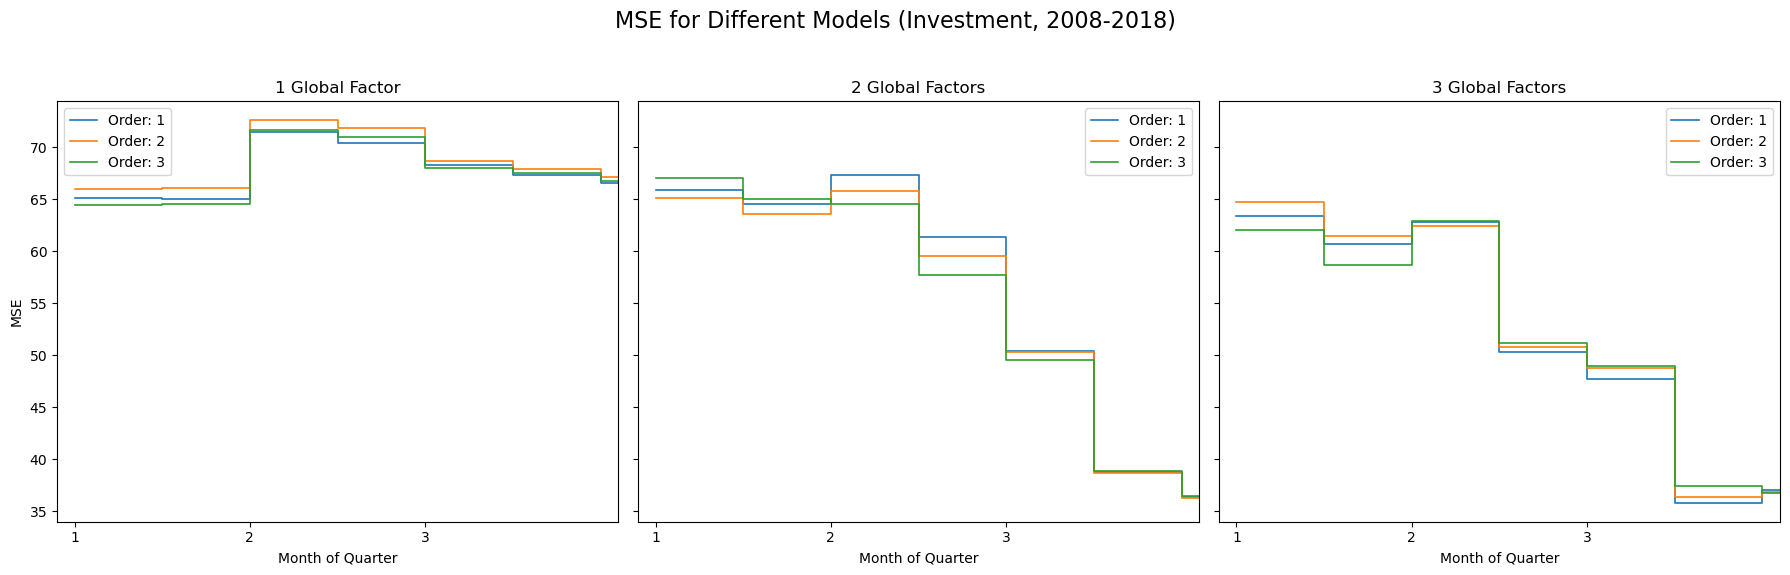

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd

vintage_col_names = ["M1-01", "M1-16", "M2-01", "M2-16", "M3-01", "M3-16", "M4-01"]
q_var = 'Investment'  

# Define a mapping for each vintage to a numeric x-value
x_mapping = {
    "M1-01": 1.0,
    "M1-16": 1.5,
    "M2-01": 2.0,
    "M2-16": 2.5,
    "M3-01": 3.0,
    "M3-16": 3.5,
    "M4-01": 4.0
}

# Construct x values based on the vintages
x_values = [x_mapping[col] for col in vintage_col_names]
# Extend the x array so that the last step extends to the end of the x-axis
x_extended = x_values.copy()
x_extended.append(4.1)  # extend x-axis to 4.1

# Define the directory containing MSE files
mse_dir = f"../MSE/DFM_hard_surveys_global_factors_{q_var}"

# Create a figure with 1 row and 3 columns of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Loop over each number of global factors (1, 2, and 3)
for i, num_factors in enumerate(range(1, 4)):
    ax = axs[i]
    # Within each subplot, loop over factor orders 1 to 3
    for order in range(1, 4):
        # Construct file name based on the model's parameters
        factors_str = f"Global_{num_factors}_{order}"
        mse_file_name = f"MSE_{q_var}_{factors_str}.csv"
        mse_file_path = os.path.join(mse_dir, mse_file_name)
        
        # Load the MSE values from file
        mse_df = pd.read_csv(mse_file_path)
        # Construct y values based on the vintages
        y_values = [mse_df[col].iloc[0] for col in vintage_col_names]
        
        # Extend the y-values so the step function holds the last value
        y_extended = y_values.copy()
        y_extended.append(y_values[-1]) # Repeat the last value
        
        # Plot the step function for the current model
        ax.step(x_extended, y_extended, where='post', linewidth=1.2, 
                 label=f"Order: {order}")
        
    # Customize the subplot
    ax.set_xlabel("Month of Quarter")
    # Set ticks only at 1, 2, and 3 to mark the beginning of each month
    ax.set_xticks([1, 2, 3])
    ax.set_xlim(0.9, 4.1)
    ax.set_title(f"{num_factors} Global Factor{'s' if num_factors > 1 else ''}")
    if i == 0:  # Only the leftmost subplot gets the y-axis label
        ax.set_ylabel("MSE")
    ax.legend()

plt.suptitle(f"MSE for Different Models ({q_var}, 2008-2018)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Create the "plots" directory if it doesn't exist and save the figure as PNG and EPS
os.makedirs(f"../plots/DFM_hard_surveys_global_factors_{q_var}", exist_ok=True)
base_filename = os.path.join(f"../plots/DFM_hard_surveys_global_factors_{q_var}", f"DFM_hard_surveys_global_factors_2008-2018_{q_var}")
plt.savefig(f"{base_filename}.png", format="png")
plt.savefig(f"{base_filename}.eps", format="eps")

plt.show()

Plot MSE values for all models evaluated over the 2008–2010 and 2011-2018 periods.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


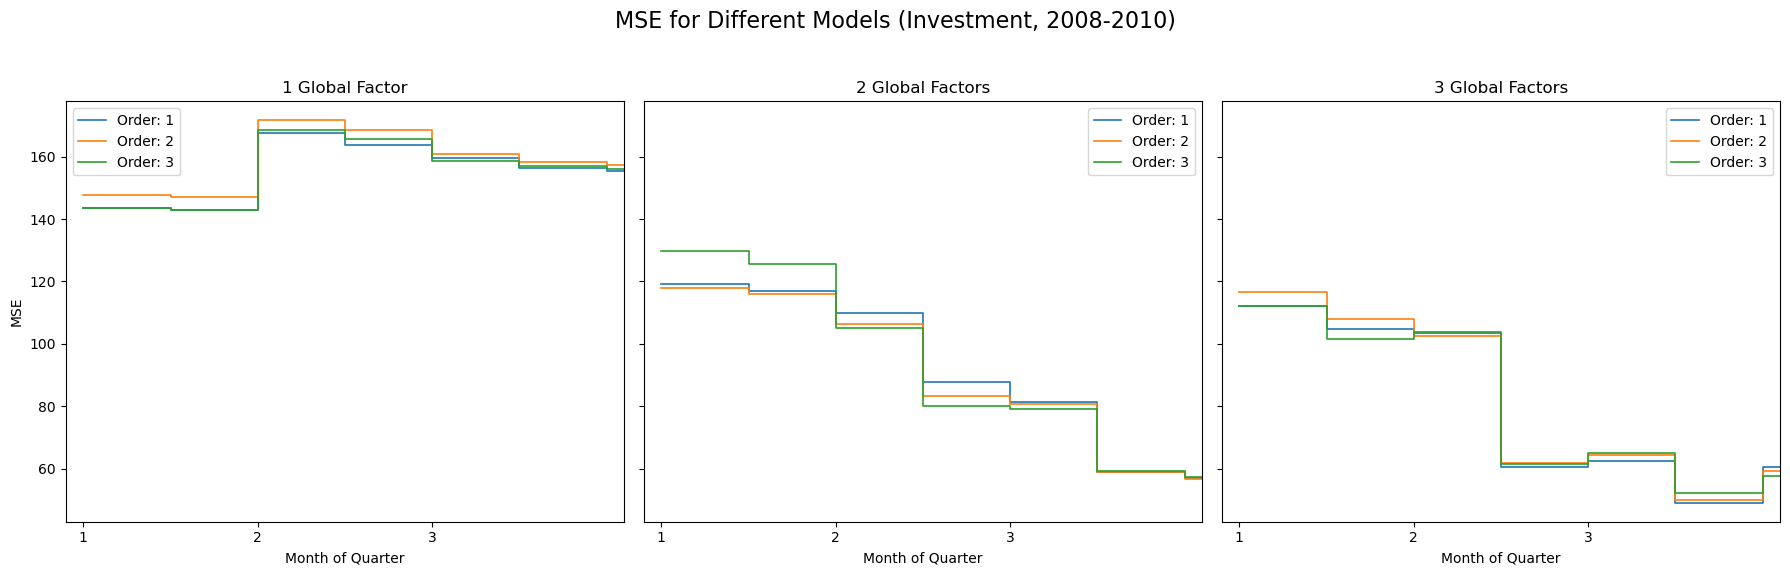

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


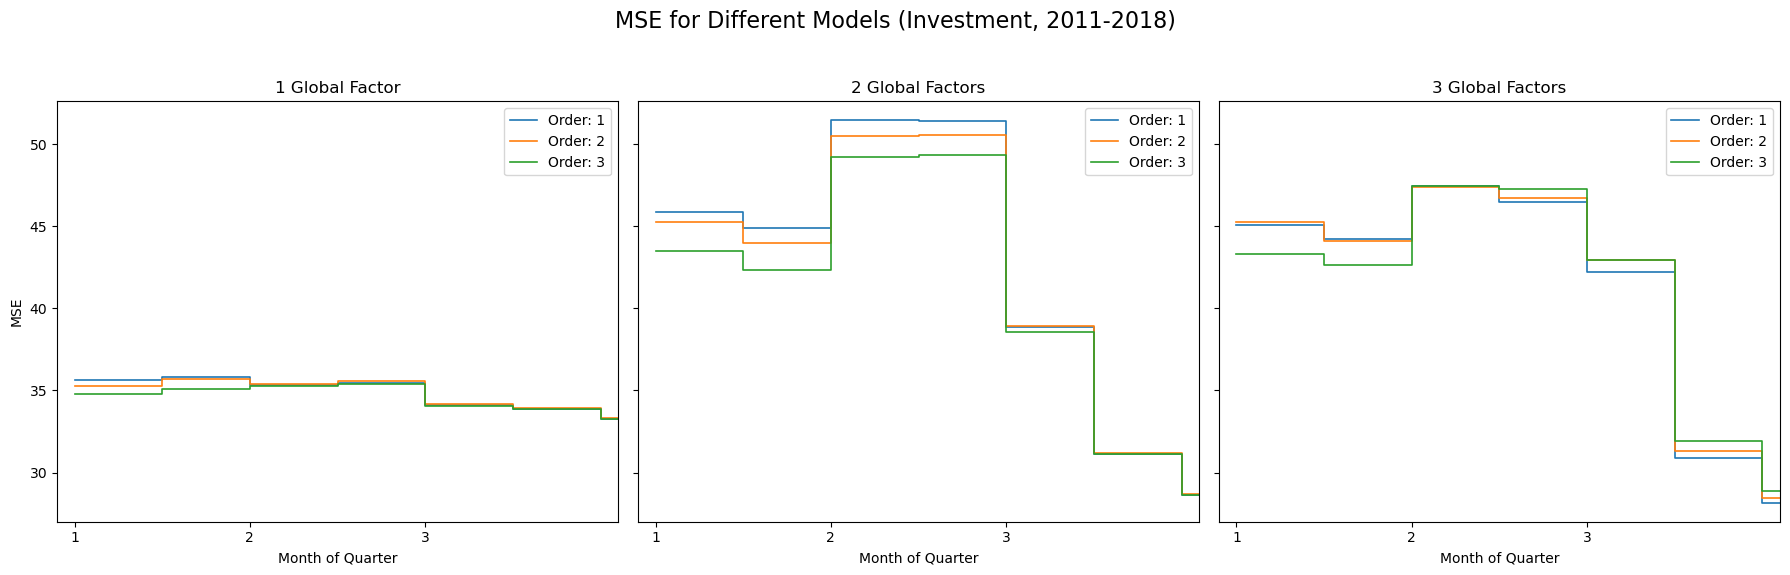

In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def quarter_to_float(q_str):
    """
    Convert a string like 'YYYY-MM'
    into a float: e.g. 2008-03 -> 2008.00, 2008-06 -> 2008.25, etc.
    """
    year = int(q_str[:4])
    month = int(q_str[5:])
    # Map month to fraction of the year
    if month == 3:
        fraction = 0.00
    elif month == 6:
        fraction = 0.25
    elif month == 9:
        fraction = 0.50
    elif month == 12:
        fraction = 0.75
    return year + fraction

# Forecast variable and directories
q_var = 'Investment'
forecasts_dir = f"../forecasts/DFM_hard_surveys_global_factors_{q_var}"
actual_growth_file = f"../{q_var}_growth_actual.csv"

# Vintage columns
vintage_col_names = ["M1-01", "M1-16", "M2-01", "M2-16", "M3-01", "M3-16", "M4-01"]

# Load actual growth data and convert 'date' to float
actual_growth = pd.read_csv(actual_growth_file)
actual_growth["date_float"] = actual_growth["date"].apply(quarter_to_float)
actual_growth.sort_values("date_float", inplace=True)

# Define two periods
periods = {
    "2008-2010": lambda df: df["date_float"] < 2011,
    "2011-2018": lambda df: df["date_float"] >= 2011
}

# Define a mapping for each vintage to a numeric x-value
x_mapping = {
    "M1-01": 1.0,
    "M1-16": 1.5,
    "M2-01": 2.0,
    "M2-16": 2.5,
    "M3-01": 3.0,
    "M3-16": 3.5,
    "M4-01": 4.0
}

# Construct x values based on the vintages
x_values = [x_mapping[col] for col in vintage_col_names]
# Extend the x array so that the last step extends to the end of the x-axis
x_extended = x_values.copy()
x_extended.append(4.1)  # extend x-axis to 4.1

# Loop over each period and create a separate figure
for period_label, period_filter in periods.items():
    
    # Create a figure with 1 row and 3 columns of subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
    # Loop over each number of global factors (1, 2, and 3)
    for i, num_factors in enumerate(range(1, 4)):
        ax = axs[i]
        # Within each subplot, loop over factor orders 1 to 3
        for order in range(1, 4):
            # Construct forecast file name, e.g., "forecasts_Investment_Global_1_1.csv"
            factors_str = f"Global_{num_factors}_{order}"
            forecast_file_name = f"forecasts_{q_var}_{factors_str}.csv"
            forecast_file_path = os.path.join(forecasts_dir, forecast_file_name)
    
            # Load forecast data 
            forecasts = pd.read_csv(forecast_file_path, index_col=0)
            forecasts.index.name = "date"
            forecasts.reset_index(inplace=True)
            
            # Merge forecasts with actual growth 
            merged = pd.merge(forecasts, actual_growth, on="date", how="inner")
            merged["date_float"] = merged["date"].apply(quarter_to_float)
            merged.sort_values("date_float", inplace=True)
            
            # Filter merged data for the current period
            merged_period = merged[ period_filter(merged) ]
            
            # Calculate MSE for each vintage column over the filtered period
            mse_dict = {}
            for col in vintage_col_names:
                mse = ((merged_period[col] - merged_period["growth"]) ** 2).mean()
                mse_dict[col] = mse
                
            # Construct y values based on the vintages
            y_values = [mse_dict[col] for col in vintage_col_names]
            
            # Extend the y-values so the step function holds the last value
            y_extended = y_values.copy()
            y_extended.append(y_values[-1]) # Repeat the last value
            
            # Plot the step function for the current model (order)
            ax.step(x_extended, y_extended, where='post', linewidth=1.2, 
                    label=f"Order: {order}")
            
        # Customize the subplot
        ax.set_xlabel("Month of Quarter")
        # Set ticks only at 1, 2, and 3 to mark the beginning of each month
        ax.set_xticks([1, 2, 3])
        ax.set_xlim(0.9, 4.1)
        ax.set_title(f"{num_factors} Global Factor{'s' if num_factors > 1 else ''}")
        if i == 0:  # Only the leftmost subplot gets the y-axis label
            ax.set_ylabel("MSE")
        ax.legend()
   
    plt.suptitle(f"MSE for Different Models ({q_var}, {period_label})", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Create the "plots" directory if it doesn't exist and save the figure as PNG and EPS
    os.makedirs(f"../plots/DFM_hard_surveys_global_factors_{q_var}", exist_ok=True)
    base_filename = os.path.join(f"../plots/DFM_hard_surveys_global_factors_{q_var}", f"DFM_hard_surveys_global_factors_{period_label}_{q_var}")
    plt.savefig(f"{base_filename}.png", format="png")
    plt.savefig(f"{base_filename}.eps", format="eps")

    plt.show()

Plot forecasts vs actual growth values for all models and different time periods (2008-2010, 2008-2018, and 2011-2018).

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


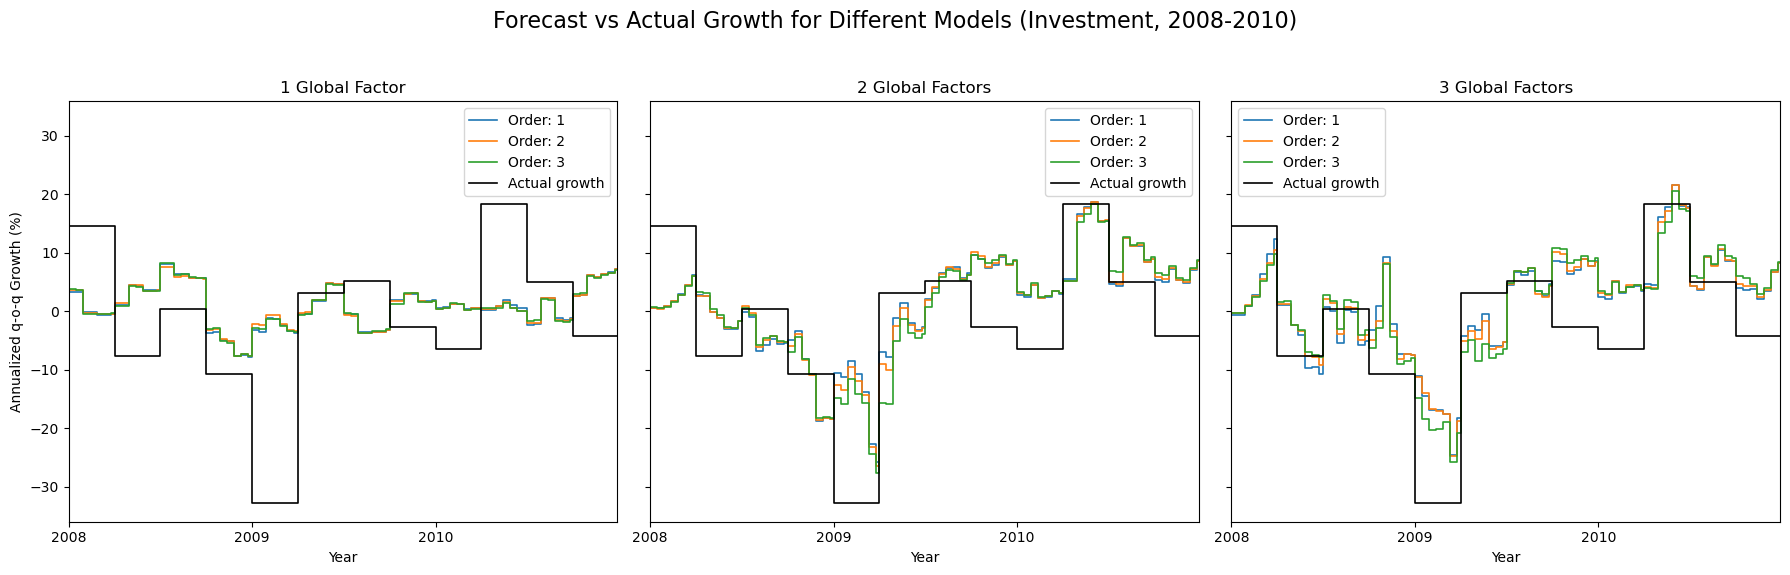

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


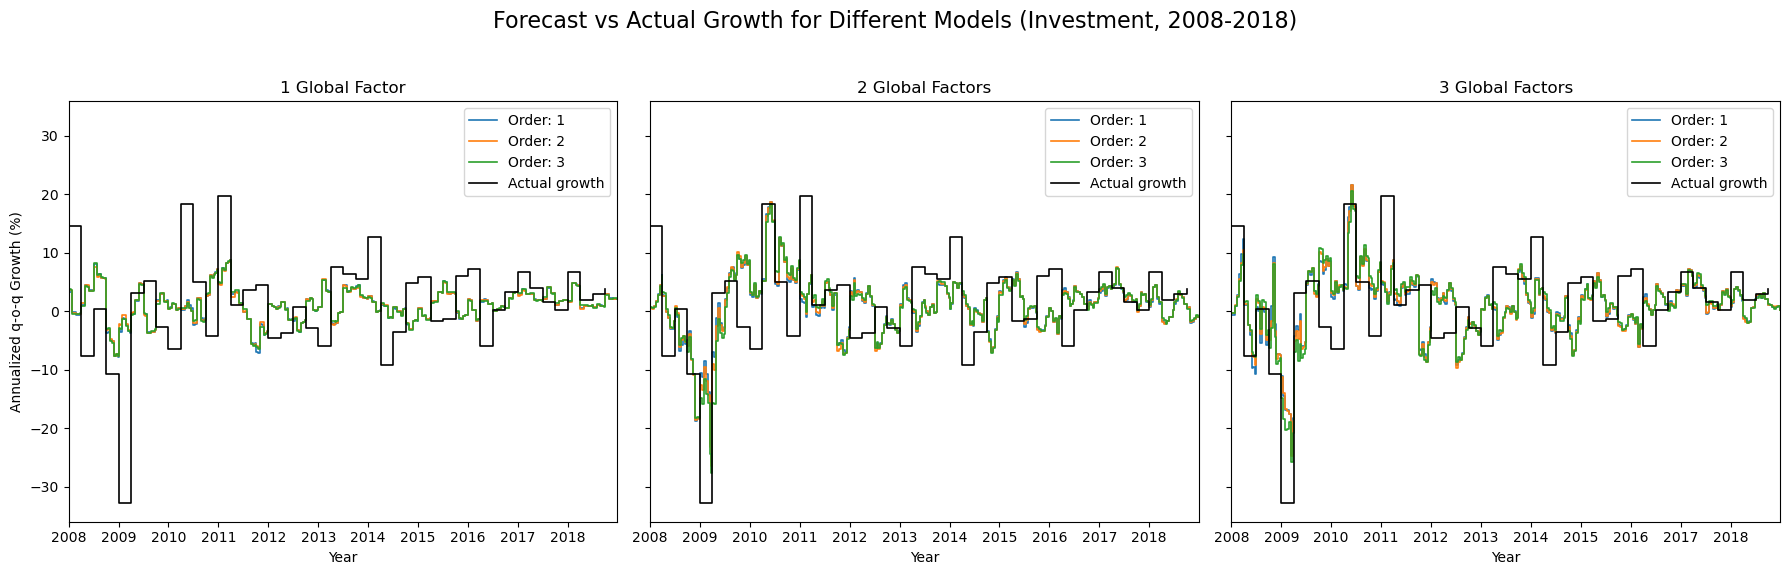

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


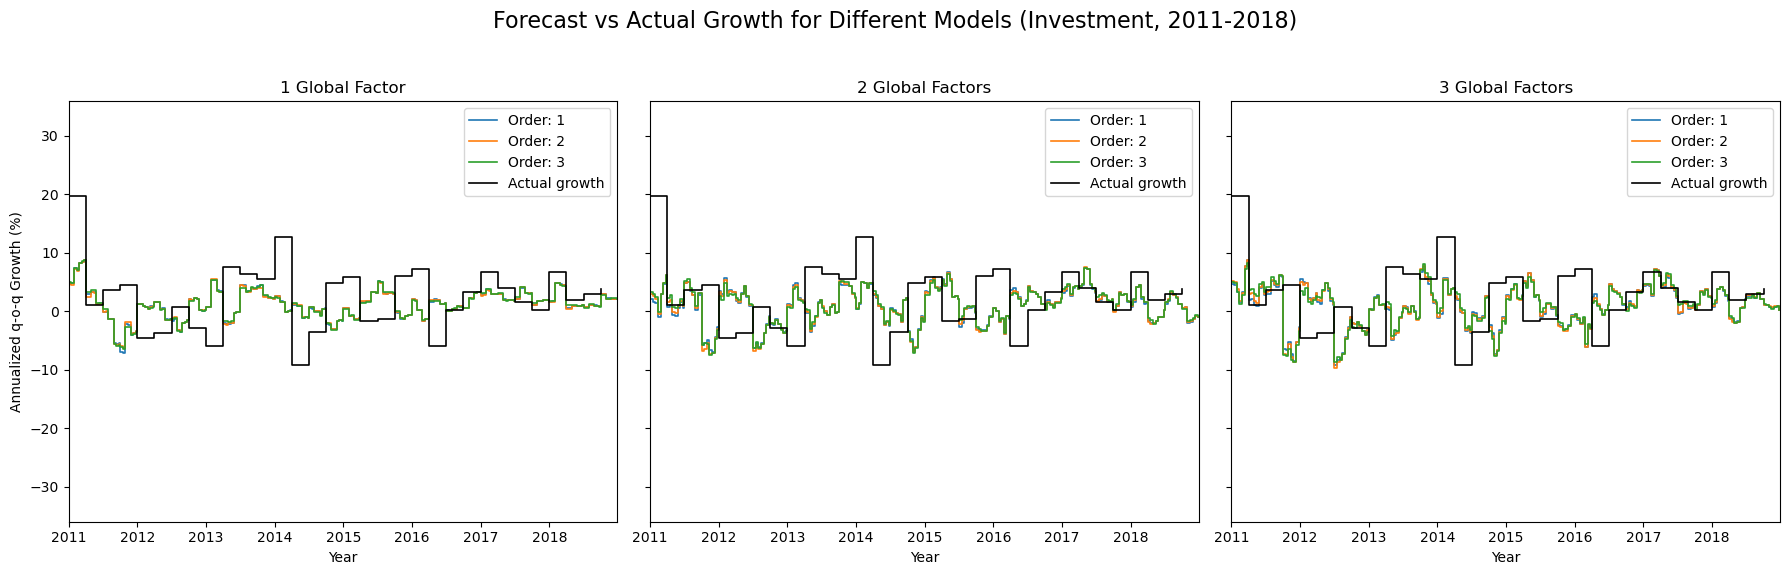

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert quarter strings like "2008-03" into a float (e.g. 2008.00 for Q1, 2008.25 for Q2, etc.)
def quarter_to_float(q_str):
    """
    Convert a string like 'YYYY-MM'
    into a float: e.g. 2008-03 -> 2008.00, 2008-06 -> 2008.25, etc.
    """
    year = int(q_str[:4])
    month = int(q_str[5:])
    # Map month to fraction of the year
    if month == 3:
        fraction = 0.00
    elif month == 6:
        fraction = 0.25
    elif month == 9:
        fraction = 0.50
    elif month == 12:
        fraction = 0.75
    return year + fraction

# Forecast variable and directories
q_var = 'Investment'
forecasts_dir = f"../forecasts/DFM_hard_surveys_global_factors_{q_var}"
actual_growth_file = f"../{q_var}_growth_actual.csv"

# Vintage columns
vintage_col_names = ["M1-01", "M1-16", "M2-01", "M2-16", "M3-01", "M3-16", "M4-01"]

# Assign 7 small offsets within each quarter, so each quarter has 7 forecast points
offsets = np.linspace(0, 0.23, 7)

# Load actual growth data and convert 'date' to float
actual_growth = pd.read_csv(actual_growth_file)
actual_growth["date_float"] = actual_growth["date"].apply(quarter_to_float)
actual_growth.sort_values("date_float", inplace=True)

# Build x,y arrays for the actual growth
x_act = actual_growth["date_float"].tolist()
y_act = actual_growth["growth"].tolist()

# Define period configurations: x-axis limits and tick positions for each period
period_configs = {
    "2008-2010": {"xlim": (2008, 2010.99), "xticks": list(range(2008, 2011))},
    "2008-2018": {"xlim": (2008, 2018.99), "xticks": list(range(2008, 2019))},
    "2011-2018": {"xlim": (2011, 2018.99), "xticks": list(range(2011, 2019))}
}

# Loop over each period configuration to create and save separate plots
for period_label, config in period_configs.items():

    # Create a figure with 1 row and 3 columns for the three global factor counts
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    # Loop over each global factor count (1, 2, and 3)
    for i, num_factors in enumerate([1, 2, 3]):
        ax = axs[i]

        # For each global factor count, plot forecasts for orders 1, 2, and 3
        for order in range(1, 4):

            # Construct forecast file name, e.g., "forecasts_Investment_Global_1_1.csv"
            factors_str = f"Global_{num_factors}_{order}"
            forecast_file_name = f"forecasts_{q_var}_{factors_str}.csv"
            forecast_file_path = os.path.join(forecasts_dir, forecast_file_name)

            # Load forecast data 
            forecasts = pd.read_csv(forecast_file_path, index_col=0)
            forecasts.index.name = "date"
            forecasts.reset_index(inplace=True)

            # Merge forecasts with actual growth dates
            merged = pd.merge(forecasts, actual_growth[['date']], on="date", how="inner")
            merged["date_float"] = merged["date"].apply(quarter_to_float)
            merged.sort_values("date_float", inplace=True)

            # Build forecast x and y arrays 
            x_fore = []
            y_fore = []
            for idx, row in merged.iterrows():
                base_x = row["date_float"]
                # For each of the 7 vintage columns, define an x-position and take that forecast value
                for j, col in enumerate(vintage_col_names):
                    x_fore.append(base_x + offsets[j])
                    y_fore.append(row[col])

            # Plot the forecast step curve for the current order
            ax.step(x_fore, y_fore, where='post', linewidth=1.2, label=f"Order: {order}")

        # Plot actual growth as a step plot in each subplot
        ax.step(x_act, y_act, where='post', color='black', linewidth=1.2, label="Actual growth")

        # Customize the subplot
        ax.set_xlabel("Year")
        ax.set_xlim(config["xlim"][0], config["xlim"][1])
        ax.set_xticks(config["xticks"])
        ax.set_title(f"{num_factors} Global Factor{'s' if num_factors > 1 else ''}")
        if i == 0:
            ax.set_ylabel("Annualized q-o-q Growth (%)")
        ax.legend()
        
    plt.suptitle(f"Forecast vs Actual Growth for Different Models ({q_var}, {period_label})", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Create the "plots" directory if it doesn't exist and save the figure as PNG and EPS
    os.makedirs(f"../plots/DFM_hard_surveys_global_factors_{q_var}", exist_ok=True)
    base_filename = os.path.join(f"../plots/DFM_hard_surveys_global_factors_{q_var}", f"DFM_hard_surveys_global_factors_forecast_vs_actual_{period_label}_{q_var}")
    plt.savefig(f"{base_filename}.png", format="png")
    plt.savefig(f"{base_filename}.eps", format="eps")

    plt.show()